<a href="https://colab.research.google.com/github/rubygitflow/Higher-Math/blob/main/University_of_Artificial_Intelligence_Basic_Mathematics_Lesson_13_Finding_the_shortest_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотека NetworkX



In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import networkx as nx

import bellmanford as bf

## Лекция

- Graph – реализация простого неориентированного графа. Дополнительные вершины между двумя узлами игнорируются, возможны узлы соединённые с самим собой.
- DiGraph — ориентированный граф, добавлены функции и ограничения специфические для этого типа графов.
- MultiGraph — реализация мультиграфов, в таких графах возможно существование пар вершин, которые соединены более чем одним ребром (ненаправленным), либо более чем двумя дугами противоположных направлений.
- MultiDiGraph — соответственно ориентированный мультиграф.

In [2]:
# Ищем Кратчайший Путь
# Создаем пустой направленный граф
G = nx.DiGraph()

# Добавим 6 вершим
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

# Добавим ребра и связи между ними
G.add_edge(1, 2, length=9)
G.add_edge(1, 3, length=15)
G.add_edge(1, 4, length=22)
G.add_edge(1, 5, length=34)
G.add_edge(1, 6, length=49)
G.add_edge(2, 3, length=9)
G.add_edge(2, 4, length=15)
G.add_edge(2, 5, length=22)
G.add_edge(2, 6, length=34)
G.add_edge(3, 4, length=9)
G.add_edge(3, 5, length=15)
G.add_edge(3, 6, length=22)
G.add_edge(4, 5, length=9)
G.add_edge(4, 6, length=15)
G.add_edge(5, 6, length=9)

In [4]:
# Присвоим координаты вершинам
G.nodes[1]['pos'] = (0,0)
G.nodes[2]['pos'] = (2,2)
G.nodes[3]['pos'] = (2,-2)
G.nodes[4]['pos'] = (5,2)
G.nodes[5]['pos'] = (5,-2)
G.nodes[6]['pos'] = (7,0)
# Координаты вершин храняться в словаре
node_pos=nx.get_node_attributes(G,'pos')
# Веса ребер и доп аттрибуты тоже храняться в словаре
arc_weight=nx.get_edge_attributes(G,'length')

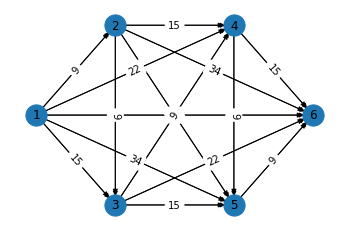

In [5]:
# Отрисовываем вершины
nx.draw_networkx(G, node_pos, node_size=450)

# Отрисовываем ребра
nx.draw_networkx_edges(G, node_pos)

# Подписываем вершины, ребра и веса
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_weight)

# Удалим координатные оси
plt.axis('off')

# Выводим
plt.show()

In [6]:
# Вычисляем кратчайший путь между вершиной 1 и 6 (По умолчанию в shortest_path используется алгоритм Дейкстры)
nx.shortest_path(G, source=1, target=6, weight="length")

[1, 3, 6]

In [7]:
# Получаем все варианты кратчайших путей, all_p - это Генератор
all_p = nx.all_shortest_paths(G, source=1, target=6, weight="length")

In [8]:
next(all_p)

[1, 3, 6]

In [9]:
# Вычисляем Кратчайший путь по алгоритму Дейкстры
nx.dijkstra_path(G, source=1, target=6, weight="length")

[1, 3, 6]

In [10]:
# Вычисляем длину Кратчайшего пути по алгоритму Дейкстры
nx.dijkstra_path_length(G, source=1, target=6, weight="length")

37

In [11]:
# Вычисляем Кратчайший путь по алгоритму Беллмана-Форда
nx.bellman_ford_path(G, source=1, target=6, weight="length")

[1, 3, 6]

In [12]:
# Установим пакет bellmanford
!pip install bellmanford

  Created wheel for bellmanford: filename=bellmanford-0.2.1-cp37-none-any.whl size=5035 sha256=71c2eba5cd202a4c63f50597fc03d0c1289b47671f61cb9703e31e5f1e0cdfd2
  Stored in directory: /root/.cache/pip/wheels/20/61/3e/dd8db6229092c23e25793b7f2da494b31d870b73d44b4440d6
Successfully built bellmanford


In [14]:
 # Используя пакет bellmanford выведим кратчайший путь, расстояние и Наличие отрицательных циклов
 path_length, path_nodes, negative_cycle = bf.bellman_ford(G, source=1, target=6, weight="length")

In [15]:
print("Is there a negative cycle? {0}".format(negative_cycle))
print("Shortest path length: {0}".format(path_length))
print("Shortest path: {0}".format(path_nodes))

Is there a negative cycle? False
Shortest path length: 37
Shortest path: [1, 3, 6]


In [16]:
# Перерисуем граф из предыдущей задачи, заменив веса для некоторых ребер на отрицательные
G = nx.DiGraph()

# Вершины
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

# Реьра + Веса Создадим отрицательный цикл между вершинами 2->4->6->2
G.add_edge(1, 2, length=9)
G.add_edge(1, 3, length=15)
G.add_edge(1, 4, length=-5)
G.add_edge(1, 5, length=34)
G.add_edge(1, 6, length=-10) # Отрицательный вес
G.add_edge(2, 3, length=9)
G.add_edge(2, 4, length=-1) # Отрицательный вес
G.add_edge(2, 5, length=22)
G.add_edge(2, 6, length=34)
G.add_edge(3, 4, length=9)
G.add_edge(3, 5, length=15)
G.add_edge(3, 6, length=22)
G.add_edge(4, 5, length=9)
G.add_edge(4, 6, length=-15) # Отрицательный вес
G.add_edge(5, 6, length=9)
G.add_edge(6, 2, length=-1) # Отрицательный вес

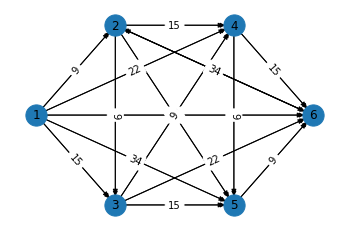

In [17]:
# Отрисовываем вершины
nx.draw_networkx(G, node_pos, node_size=450)

# Отрисовываем ребра
nx.draw_networkx_edges(G, node_pos)

# Подписываем вершины, ребра и веса
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_weight)

# Удалим координатные оси
plt.axis('off')

# Выводим
plt.show()

In [18]:
 # Еще раз выведем  кратчайший путь, длину пути и наличие отрицательных циклов
 path_length, path_nodes, negative_cycle = bf.bellman_ford(G, source=1, target=6, weight="length")

In [19]:
print("Is there a negative cycle? {0}".format(negative_cycle))
print("Shortest path length: {0}".format(path_length))
print("Shortest path: {0}".format(path_nodes))

Is there a negative cycle? True
Shortest path length: -17
Shortest path: [6, 2, 4, 6]


In [20]:
# Сравним с алгоритмом Дейкстры
nx.dijkstra_path(G, source=1, target=6, weight="length")

[1, 6]

In [ ]:
# Как видно, алгоритм не справился с задачей и не нашел самый кратчайший вариант

## ДЗ

In [40]:
# Задача 1
#  Дан следующий граф:
G = nx.Graph();

for i in range(1,7):
  G.add_node(i)

# Присвоим координаты вершинам
G.nodes[1]['pos'] = (0,0)
G.nodes[2]['pos'] = (2,2)
G.nodes[3]['pos'] = (2,-2)
G.nodes[4]['pos'] = (5,2)
G.nodes[5]['pos'] = (5,-2)
G.nodes[6]['pos'] = (7,0)

G.add_edge(1, 2, node_color = 'm', weight = 2) # Параметр weight задает вес ребра
G.add_edge(1, 3, node_color = 'm', weight = 1)
G.add_edge(1, 4, node_color = 'm', weight = 20)
G.add_edge(1, 5, node_color = 'm', weight = 10)
G.add_edge(1, 6, node_color = 'm', weight = 15)
G.add_edge(5, 4, node_color = 'm', weight = 1)
G.add_edge(1, 6, node_color = 'm', weight = 10)
G.add_edge(6, 1, node_color = 'm', weight = 4)
G.add_edge(2, 3, node_color = 'm', weight = 10)
G.add_edge(2, 5, node_color = 'm', weight = 5)
G.add_edge(2, 6, node_color = 'm', weight = 20)
G.add_edge(3, 6, node_color = 'm', weight = 6)
G.add_edge(4, 2, node_color = 'm', weight = 15)
G.add_edge(4, 3, node_color = 'm', weight = 40)
G.add_edge(5, 6, node_color = 'm', weight = 10)
G.add_edge(3, 5, node_color = 'm', weight = 3)


# nx.draw(G) #Отрисовка графа

# НАЙТИ: самый короткий путь от вершины 1 до вершины 4.

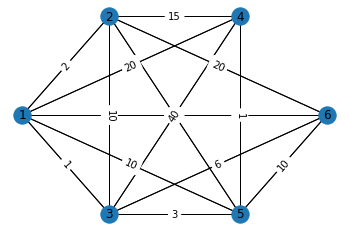

In [44]:
node_pos=nx.get_node_attributes(G,'pos')
arc_weight=nx.get_edge_attributes(G,'weight')
# Отрисовываем вершины
nx.draw_networkx(G, node_pos, node_size=300)
# Отрисовываем ребра
nx.draw_networkx_edges(G, node_pos)
# Подписываем вершины, ребра и веса
nx.draw_networkx_edge_labels(G, node_pos, edge_labels=arc_weight)
# Удалим координатные оси
plt.axis('off')
# Выводим
plt.show()

In [36]:
print(f"Кратчайший путь от 1 до 4: {nx.shortest_path(G, source=1, target=4, weight='weight')}")

Кратчайший путь от 1 до 4: [1, 3, 5, 4]


In [ ]:
# Задача 2
# Возьмите любые 20 городов,постройте граф состоящий из 20 вершин, 
# где ребра это автодороги соединяющие города, а длина пути это длина маршрута в км.
# отрисуйте граф.
# Посчитайте кратчайший путь между двумя любыми городами.

# https://www.avtodispetcher.ru/distance/table/c60189-rossiya/

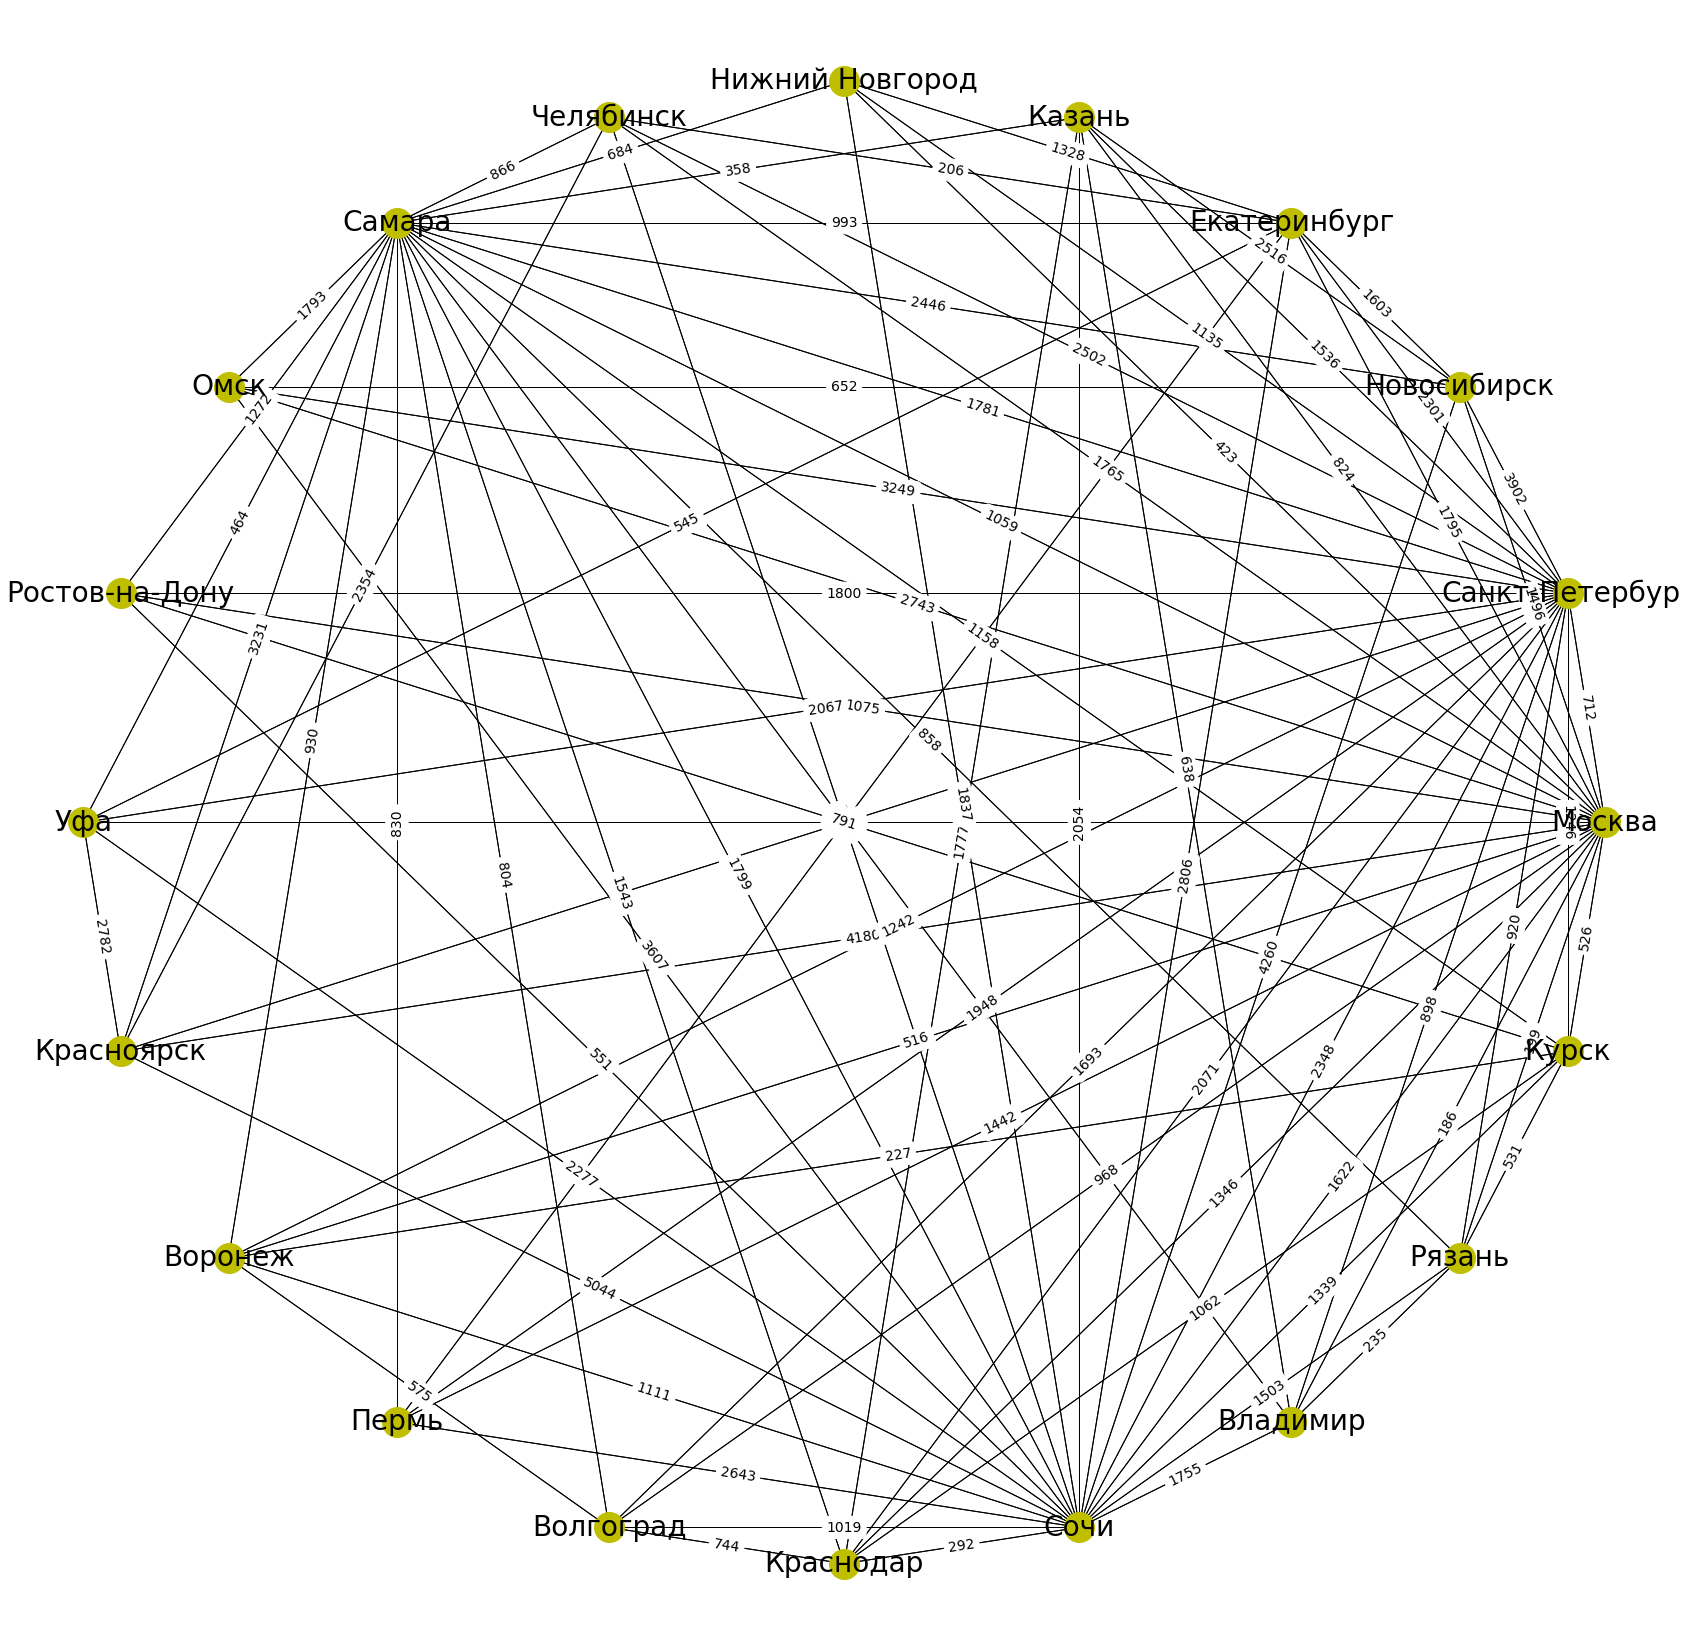

In [46]:
l_cities = ["Москва",  "Санкт-Петербург", "Новосибирск", "Екатеринбург",
            "Казань",  "Нижний Новгород", "Челябинск",   "Самара",
            "Омск",    "Ростов-на-Дону",  "Уфа",         "Красноярск",
            "Воронеж", "Пермь",           "Волгоград",   "Краснодар",
            "Сочи",    "Владимир",        "Рязань",      "Курск"]
G = nx.Graph()
G.add_nodes_from(l_cities)
nodesList = list(G.nodes())

G.add_edge("Москва","Санкт-Петербург", dist = 712 )
G.add_edge("Москва","Новосибирск", dist = 1496)
G.add_edge("Москва","Екатеринбург", dist = 1795 )
G.add_edge("Москва","Казань", dist = 824)
G.add_edge("Москва","Нижний Новгород", dist = 423 )
G.add_edge("Москва","Челябинск", dist = 1765 )
G.add_edge("Москва","Самара", dist = 1059 )
G.add_edge("Москва","Омск", dist = 2743 )
G.add_edge("Москва","Ростов-на-Дону", dist = 1075 )
G.add_edge("Москва","Уфа", dist = 1355 )
G.add_edge("Москва","Красноярск", dist = 4180)
G.add_edge("Москва","Воронеж", dist = 516 )
G.add_edge("Москва","Пермь", dist = 1442 )
G.add_edge("Москва","Волгоград", dist = 968 )
G.add_edge("Москва","Краснодар", dist = 1346 )
G.add_edge("Москва","Сочи", dist = 1622 )
G.add_edge("Москва","Владимир", dist = 186 )
G.add_edge("Москва","Рязань", dist = 199 )
G.add_edge("Москва","Курск", dist = 526 )

G.add_edge("Санкт-Петербург","Новосибирск", dist = 3902 )
G.add_edge("Санкт-Петербург","Екатеринбург", dist = 2301 )
G.add_edge("Санкт-Петербург","Казань", dist = 1536 )
G.add_edge("Санкт-Петербург","Нижний Новгород", dist = 1135 )
G.add_edge("Санкт-Петербург","Челябинск", dist = 2502 )
G.add_edge("Санкт-Петербург","Самара", dist = 1781 )
G.add_edge("Санкт-Петербург","Омск", dist = 3249 )
G.add_edge("Санкт-Петербург","Ростов-на-Дону", dist = 1800 )
G.add_edge("Санкт-Петербург","Уфа", dist = 2067 )
G.add_edge("Санкт-Петербург","Красноярск", dist = 4687 )
G.add_edge("Санкт-Петербург","Воронеж", dist = 1242 )
G.add_edge("Санкт-Петербург","Пермь", dist = 1948 )
G.add_edge("Санкт-Петербург","Волгоград", dist = 1693 )
G.add_edge("Санкт-Петербург","Краснодар", dist = 2071 )
G.add_edge("Санкт-Петербург","Сочи", dist = 2348 )
G.add_edge("Санкт-Петербург","Владимир", dist = 898 )
G.add_edge("Санкт-Петербург","Рязань", dist = 920 )
G.add_edge("Санкт-Петербург","Курск", dist = 1246 )

G.add_edge("Сочи","Новосибирск", dist = 4260 )
G.add_edge("Сочи","Екатеринбург", dist = 2806)
G.add_edge("Сочи","Казань", dist = 2054 )
G.add_edge("Сочи","Нижний Новгород", dist = 1837 )
G.add_edge("Сочи","Челябинск", dist = 2680 )
G.add_edge("Сочи","Самара", dist = 1799 )
G.add_edge("Сочи","Омск", dist = 3607 )
G.add_edge("Сочи","Ростов-на-Дону", dist = 551 )
G.add_edge("Сочи","Уфа", dist = 2277 )
G.add_edge("Сочи","Красноярск", dist = 5044 )
G.add_edge("Сочи","Воронеж", dist = 1111 )
G.add_edge("Сочи","Пермь", dist = 2643 )
G.add_edge("Сочи","Волгоград", dist = 1019 )
G.add_edge("Сочи","Краснодар", dist = 292 )
G.add_edge("Сочи","Владимир", dist = 1755 )
G.add_edge("Сочи","Рязань", dist = 1503 )
G.add_edge("Сочи","Курск", dist = 1339 )

G.add_edge("Самара","Новосибирск", dist = 2446 )
G.add_edge("Самара","Екатеринбург", dist = 993)
G.add_edge("Самара","Казань", dist = 358 )
G.add_edge("Самара","Нижний Новгород", dist = 684 )
G.add_edge("Самара","Челябинск", dist = 866 )
G.add_edge("Самара","Омск", dist = 1793 )
G.add_edge("Самара","Ростов-на-Дону", dist = 1272)
G.add_edge("Самара","Уфа", dist = 464 )
G.add_edge("Самара","Красноярск", dist = 3231 )
G.add_edge("Самара","Воронеж", dist = 930 )
G.add_edge("Самара","Пермь", dist = 830 )
G.add_edge("Самара","Волгоград", dist = 804 )
G.add_edge("Самара","Краснодар", dist = 1543 )
G.add_edge("Самара","Владимир", dist = 927 )
G.add_edge("Самара","Рязань", dist = 858 )
G.add_edge("Самара","Курск", dist = 1158 )

G.add_edge("Екатеринбург","Новосибирск", dist = 1603 )
G.add_edge("Екатеринбург","Нижний Новгород", dist = 1328 )
G.add_edge("Екатеринбург","Челябинск", dist = 206 )
G.add_edge("Екатеринбург","Пермь", dist = 361 )
G.add_edge("Казань","Новосибирск", dist = 2516 )
G.add_edge("Казань","Владимир", dist = 638 )
G.add_edge("Казань","Самара", dist = 358 )
G.add_edge("Уфа","Екатеринбург", dist = 545 )
G.add_edge("Краснодар","Казань", dist = 1777 )
G.add_edge("Краснодар","Курск", dist = 1062 )
G.add_edge("Новосибирск","Омск", dist = 652 )
G.add_edge("Курск","Ростов-на-Дону", dist = 791 )
G.add_edge("Курск","Воронеж", dist = 227)
G.add_edge("Красноярск","Уфа", dist = 2782 )
G.add_edge("Челябинск","Красноярск", dist = 2354 )
G.add_edge("Воронеж","Волгоград", dist = 575 )
G.add_edge("Волгоград","Краснодар", dist = 744 )
G.add_edge("Владимир","Рязань", dist = 235 )
G.add_edge("Рязань","Курск", dist = 531 )

# Расстояния ребер храняться в словаре
arc_dist=nx.get_edge_attributes(G,'dist')

length = 20
alpha = np.linspace(0, 2 * np.pi, length+1)
r = 1
for i in range(length):
  x = r * np.cos(alpha[i])
  y = r * np.sin(alpha[i])
  # Присвоим координаты вершинам
  G.nodes[nodesList[i]]['pos'] = (x,y)

# Координаты вершин храняться в словаре
node_pos=nx.get_node_attributes(G,'pos')

plt.figure(figsize=(30,30))

# Отрисовываем вершины
nx.draw_networkx(G, node_pos, node_color='y',  font_size=28, node_size=900)

# Отрисовываем ребра
nx.draw_networkx_edges(G, node_pos)

# Подписываем вершины, ребра и веса
nx.draw_networkx_edge_labels(G, node_pos, font_size=14, edge_labels=arc_dist)

plt.axis('off')
# Выводим
plt.show()

In [48]:
print(f"Кратчайший путь от Перми до Сочи: {nx.dijkstra_path(G, source='Пермь', target='Сочи', weight='dist')}")

Кратчайший путь от Перми до Сочи: ['Пермь', 'Самара', 'Сочи']
